In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X,y = make_moons(n_samples=1000, noise=0.25, random_state=42)

Text(0.5, 1.0, 'Moons Dataset')

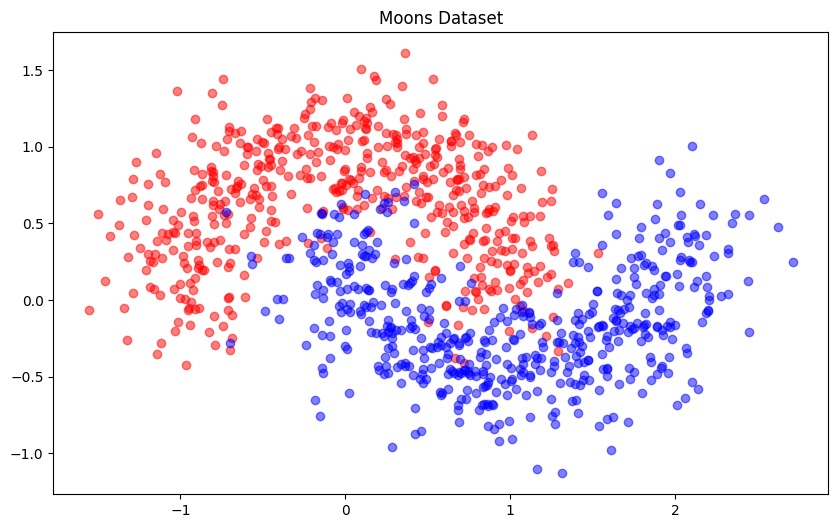

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0', alpha=0.5)
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1', alpha=0.5)
plt.title('Moons Dataset')

In [5]:
X

array([[-0.14176498,  0.55823629],
       [ 1.19796627, -0.30399544],
       [ 0.759391  ,  0.1102501 ],
       ...,
       [ 1.74928256, -0.46913281],
       [-1.03812901,  0.07100752],
       [ 0.76777666,  0.64312267]])

In [6]:
model = Sequential()

In [7]:
model.add(Dense(64, activation='relu', input_shape=(2,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
25/25 [==============================] - 3s 12ms/step - loss: 0.6198 - accuracy: 0.7400 - val_loss: 0.5279 - val_accuracy: 0.8250
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4583 - accuracy: 0.8313 - val_loss: 0.4007 - val_accuracy: 0.8400
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3553 - accuracy: 0.8525 - val_loss: 0.3331 - val_accuracy: 0.8650
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3165 - accuracy: 0.8575 - val_loss: 0.3209 - val_accuracy: 0.8700
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3011 - accuracy: 0.8625 - val_loss: 0.3074 - val_accuracy: 0.8650
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2917 - accuracy: 0.8700 - val_loss: 0.3072 - val_accuracy: 0.8800
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2886 - accuracy: 0.8700 - val_loss: 0.2918 - val_accuracy: 0.8850
Epoch 8/100


9600/9600 [==============================] - 11s 1ms/step


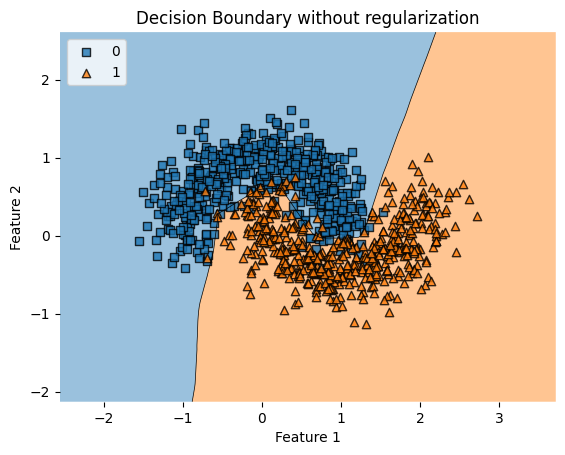

In [10]:
plot_decision_regions(X, y, clf=model, legend=2)
plt.title('Decision Boundary without regularization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()

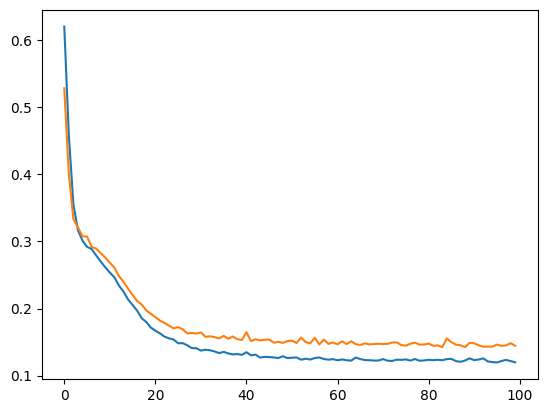

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

In [12]:
model2 = Sequential()
model2.add(Dense(128, input_shape=(2,), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model2.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model2.add(Dense(1, activation='sigmoid'))

In [13]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history2 = model2.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1.3784 - accuracy: 0.7663 - val_loss: 1.1698 - val_accuracy: 0.8000
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0052 - accuracy: 0.8288 - val_loss: 0.8755 - val_accuracy: 0.8400
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7700 - accuracy: 0.8450 - val_loss: 0.6978 - val_accuracy: 0.8500
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6271 - accuracy: 0.8537 - val_loss: 0.5885 - val_accuracy: 0.8700
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5370 - accuracy: 0.8587 - val_loss: 0.5193 - val_accuracy: 0.8700
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4780 - accuracy: 0.8562 - val_loss: 0.4730 - val_accuracy: 0.8700
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4387 - accuracy: 0.8625 - val_loss: 0.4404 - val_accuracy: 0.8700
Epoch 8/100


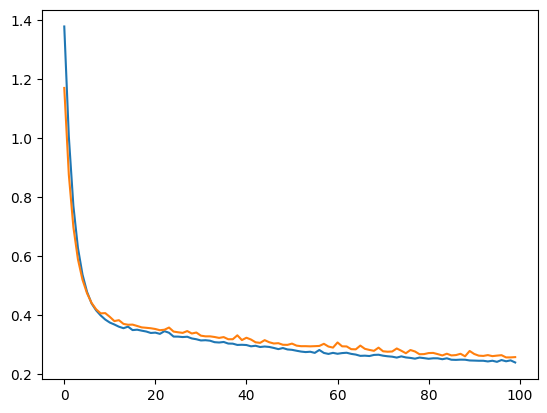

In [16]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')